# Raport z eksploracji danych

Dane z których korzystamy pochodzą ze stron https://github.com/owid/covid-19-data/tree/master/public/data oraz https://github.com/OxCGRT/covid-policy-tracker. Bazując na tych dwóch źródłach postanowiliśmy zająć się szukaniem wpływu decyzji państw, takich jak zamkniecie szkół, granic, lockdown, a rozwojem pandemii w tym kraju. Skupiliśmy się na danych z Europy, z powodów dostępu do wielu danych, bliskości nam tego terenu oraz dostępu do tabeli i opisów wprowadzonych ograniczeń w poszczególnych państwach (https://ec.europa.eu/info/files/policy-measures-against-spread-coronavirus_en).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
data = data[data['continent'] == 'Europe'].drop(columns=["continent"])

In [3]:
columns = ['iso_code', 'date', 'total_cases_per_million',
       'new_cases_per_million','new_cases_smoothed_per_million', 'new_deaths_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population_density', 'median_age', 
       'aged_65_older', 'gdp_per_capita', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']
corr_data = data[columns].corr()

## Heatmap

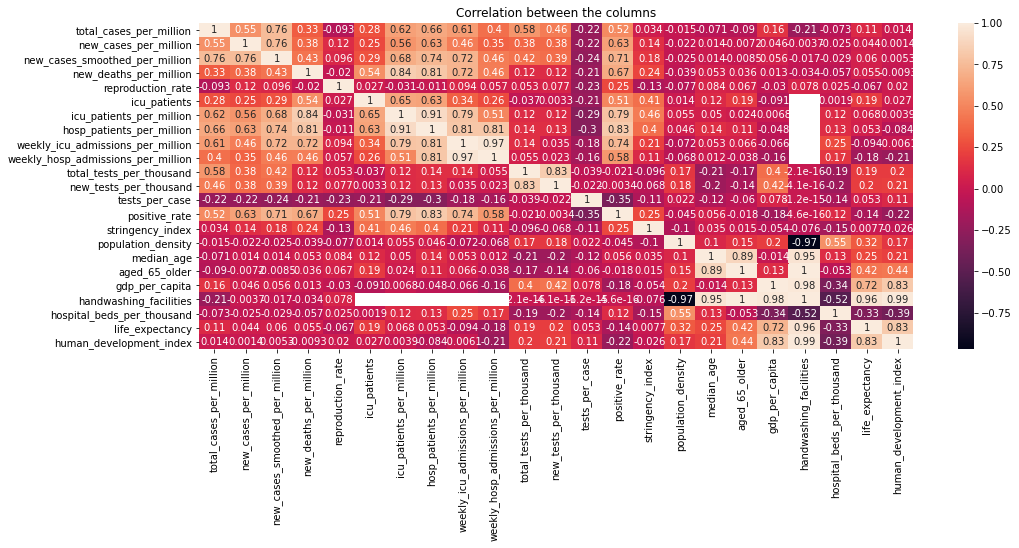

In [4]:
{
    "tags": [
        "hide-input",
    ]
}
plt.figure(figsize=(16,6))
sns.heatmap(corr_data, annot = True)
plt.title("Correlation between the columns")
plt.show()

## Wykres Reproduction Rate (Podstawowa liczba odtwarzania)

In [5]:
Repr_rate = data[columns].copy()
Repr_rate[['date']] = pd.to_datetime(Repr_rate['date'], format = '%Y-%m-%d')

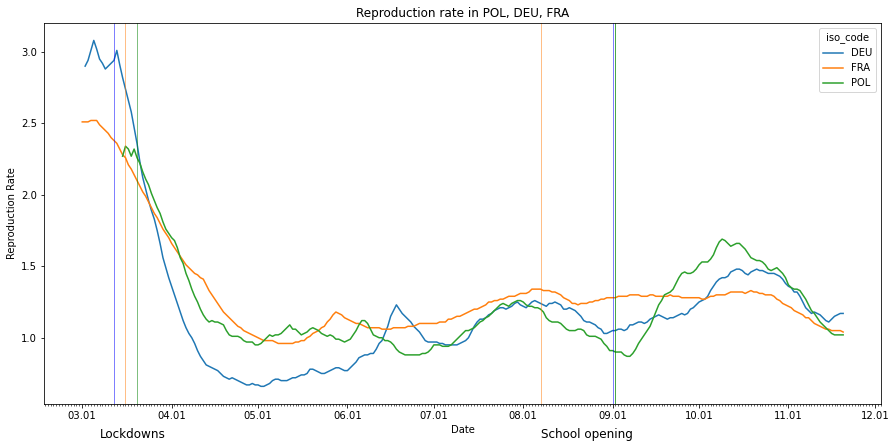

In [6]:
countries = ['POL', 'DEU', 'FRA']
plot_data = Repr_rate[Repr_rate['iso_code'].isin(countries)]
fig, ax = plt.subplots(figsize = (15, 7))
sns.lineplot(data=plot_data, x="date", y="reproduction_rate", hue = "iso_code")
countries_names = ", ".join(countries)
plt.title(f"Reproduction rate in {countries_names}")
#ax.axhline(1.0, ls = '--', color = 'r', linewidth = 1)
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%m.%d'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.axvline(x=pd.to_datetime('2020-09-02'), linewidth=0.7, color='g')
plt.axvline(x=pd.to_datetime('2020-03-20'), linewidth=0.5, color='g')
plt.axvline(x=pd.to_datetime('2020-08-07'), linewidth=0.5, color='tab:orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), linewidth=0.5, color='tab:orange')
plt.axvline(x=pd.to_datetime('2020-03-12'), linewidth=0.5, color='b')
plt.axvline(x=pd.to_datetime('2020-09-01'), linewidth=0.5, color='b')
plt.ylabel('Reproduction Rate')
plt.xlabel('Date')
plt.text(pd.to_datetime('2020-03-07'), 0.3, "Lockdowns", fontsize=12)
plt.text(pd.to_datetime('2020-08-07'), 0.3, "School opening", fontsize=12)
plt.show()

## Wykres nowych przypadków (wyrównane średnią 7 dni)

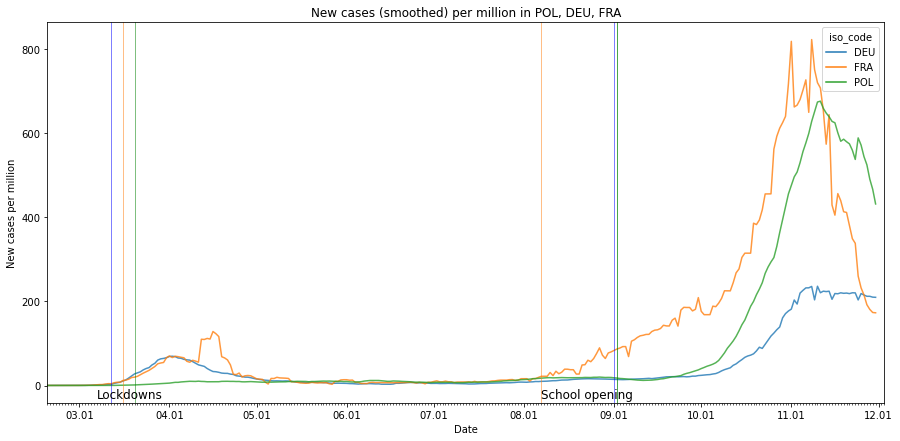

In [7]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.lineplot(data=plot_data, x="date", y='new_cases_smoothed_per_million', hue = "iso_code", alpha = 0.8)
plt.title(f"New cases (smoothed) per million in {countries_names}")
#ax.axhline(1.0, ls = '--', color = 'r', linewidth = 1)
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%m.%d'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.axvline(x=pd.to_datetime('2020-09-02'), linewidth=0.7, color='g')
plt.axvline(x=pd.to_datetime('2020-03-20'), linewidth=0.5, color='g')
plt.axvline(x=pd.to_datetime('2020-08-07'), linewidth=0.5, color='tab:orange')
plt.axvline(x=pd.to_datetime('2020-03-16'), linewidth=0.5, color='tab:orange')
plt.axvline(x=pd.to_datetime('2020-03-12'), linewidth=0.5, color='b')
plt.axvline(x=pd.to_datetime('2020-09-01'), linewidth=0.5, color='b')
plt.ylabel('New cases per million')
plt.xlabel('Date')
plt.text(pd.to_datetime('2020-03-07'), -30.0, "Lockdowns", fontsize=12)
plt.text(pd.to_datetime('2020-08-07'), -30.0, "School opening", fontsize=12)
plt.xlim(pd.to_datetime('2020-02-19'), pd.to_datetime('2020-12-03'))
plt.show()

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
response=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/bsg/COVID%20Government%20Response%20(OxBSG).csv")
f=df[['location','continent','date','total_cases','new_cases','reproduction_rate']].fillna(0).reset_index()
import warnings
warnings.filterwarnings('ignore')

In [64]:
from datetime import date, timedelta
response=response.fillna(0)
school=response[response['school_closures']>1].reset_index()
school[((school['Year']-1)!=school['Year'].shift() )|( school['Country']!=school['Country'].shift(-1))]
schoolstart=school[((school['Year']-1)!=school['Year'].shift() )]
schoolend=response[(response['school_closures'].shift()>=2)&(response['Country']==response['Country'].shift())&(response['school_closures']<=1) ]
temp=schoolstart
temp['Date']=date(2020,1,1)
temp['Status']='Start'
temp2=schoolend
temp2['Date']=date(2020,1,1)
temp2['Status']='End'
list1=pd.to_datetime(temp['Date'], format='%Y-%m-%d')+pd.to_timedelta(schoolstart['Year'], unit='d')
list1=list1.to_frame()
list2=pd.to_datetime(temp2['Date'], format='%Y-%m-%d')+pd.to_timedelta(schoolend['Year'], unit='d')
list2=list2.to_frame()
result1 = pd.concat([schoolstart, list1], axis=1, sort=False)
result2 = pd.concat([schoolend, list2], axis=1, sort=False)
result=result1.append(result2)
result=result.sort_values(by=['Year'])
result=result.sort_values(by=['Country','Year']).reset_index()
del result['index']


## Kraje najczęściej zamykające szkoły

In [10]:
result1=result1.sort_values(by=['Country'])
test=pd.concat([result1['Country']. value_counts().to_frame(),result2['Country']. value_counts().to_frame()], axis=1).fillna(0)
test.columns=["Closing","Opening"]
test.head(10)


,Closing,Opening
Greece,4,3.0
Malaysia,3,2.0
China,3,3.0
France,3,2.0
Sri Lanka,3,2.0
Dominica,2,2.0
Aruba,2,2.0
South Korea,2,2.0
Lithuania,2,2.0
Latvia,2,2.0


In [81]:
result[result['Country']=="Greece"]

,level_0,Country,Year,school_closures,workplace_closures,cancel_public_events,restriction_gatherings,close_public_transport,stay_home_requirements,restrictions_internal_movements,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_healthcare,investment_vaccines,facial_coverings,stringency_index,containment_index,Date,Status,0
152,6990,Greece,64,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,28.70,21.53,2020-01-01,Start,2020-03-05
153,12212,Greece,152,1.0,0.0,2.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,54.63,59.03,2020-01-01,End,2020-06-01
154,7078,Greece,173,3.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,46.30,52.78,2020-01-01,Start,2020-06-22
155,12238,Greece,178,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,2.0,40.74,51.39,2020-01-01,End,2020-06-27
156,7083,Greece,251,3.0,0.0,2.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,2.0,64.81,69.44,2020-01-01,Start,2020-09-08
157,12317,Greece,257,1.0,0.0,2.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,2.0,57.41,63.89,2020-01-01,End,2020-09-14
158,7089,Greece,306,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,4.0,63.43,71.53,2020-01-01,Start,2020-11-02


0 - no measures
1 - recommend closing or all schools open with alterations resulting in significant differences compared to non-Covid-19 operations
2 - require closing (only some levels or categories, eg just high school, or just public schools)
3 - require closing all levels
Blank - no data

## Jak zamykanie szkół wpływa na reproduction rate

Text(0.5, 1.0, 'How school closure affects reproduction rate of disease?')

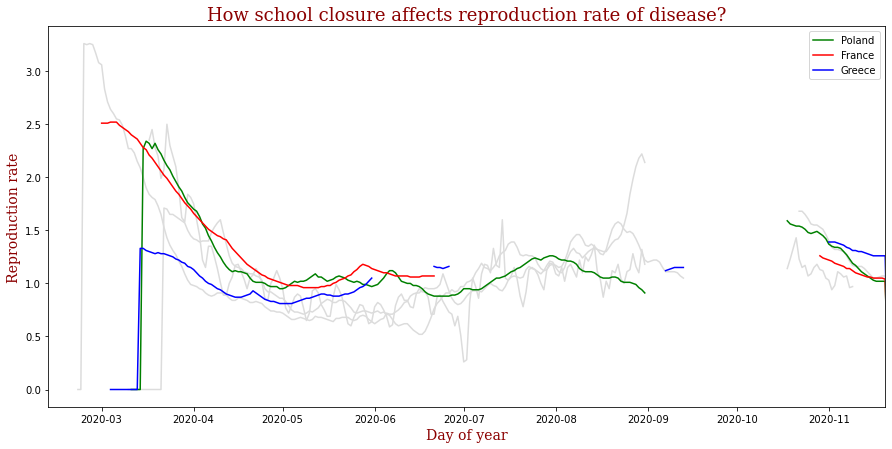

In [63]:
import datetime
pd.set_option("display.max_rows", None, "display.max_columns", None)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
font2 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

fig, ax = plt.subplots(figsize = (15, 7))
f[['date']] = pd.to_datetime(f['date'], format = '%Y-%m-%d')

test5=result[(result['Country']=='United Kingdom')].reset_index()
copy1=f[f['location']=='United Kingdom'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', label='_nolegend_')    
test5=result[(result['Country']=='Italy')].reset_index()
copy1=f[f['location']=='Italy'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', label='_nolegend_')    
test5=result[(result['Country']=='Hungary')].reset_index()
copy1=f[f['location']=='Hungary'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', label='_nolegend_')
test5=result[(result['Country']=='Poland')].reset_index()
copy1=f[f['location']=='Poland'].reset_index()
for i in range(len(test5)//2-1):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'g', label='_nolegend_')

a=test5.at[2*len(test5)//2-2,'Year']-23
b=test5.at[2*len(test5)//2-1,'Year']-22
answe=copy1.iloc[a:b]
plt.plot(answe['date'],answe['reproduction_rate'],'g', label='Poland')    
test5=result[(result['Country']=='France')].reset_index()
copy1=f[f['location']=='France'].reset_index()
for i in range(len(test5)//2-1):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'r', label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]
plt.plot(answe['date'],answe['reproduction_rate'],'r', label='France')
test5=result[(result['Country']=='Greece')].reset_index()
copy1=f[f['location']=='Greece'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'b', label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]

plt.plot(answe['date'],answe['reproduction_rate'],'b', label='Greece')
plt.legend()
plt.xlabel('Day of year', fontdict=font)
plt.ylabel('Reproduction rate', fontdict=font)
ax.set_xlim([datetime.date(2020, 2, 12), datetime.date(2020, 11, 20)])
plt.title('How school closure affects reproduction rate of disease?', fontdict=font2)

In [21]:
f[f['location']=='Poland'].reset_index()

,level_0,index,location,continent,date,total_cases,new_cases,reproduction_rate
0,42988,42988,Poland,Europe,2020-01-23,0.0,0.0,0.00
1,42989,42989,Poland,Europe,2020-01-24,0.0,0.0,0.00
2,42990,42990,Poland,Europe,2020-01-25,0.0,0.0,0.00
3,42991,42991,Poland,Europe,2020-01-26,0.0,0.0,0.00
4,42992,42992,Poland,Europe,2020-01-27,0.0,0.0,0.00
5,42993,42993,Poland,Europe,2020-01-28,0.0,0.0,0.00
6,42994,42994,Poland,Europe,2020-01-29,0.0,0.0,0.00
7,42995,42995,Poland,Europe,2020-01-30,0.0,0.0,0.00
8,42996,42996,Poland,Europe,2020-01-31,0.0,0.0,0.00
9,42997,42997,Poland,Europe,2020-02-01,0.0,0.0,0.00


In [12]:
from datetime import date, timedelta
response=response.fillna(0)
work=response[response['workplace_closures']>1].reset_index()
work[((work['Year']-1)!=work['Year'].shift() )|( work['Country']!=work['Country'].shift(-1))]
workstart=work[((work['Year']-1)!=work['Year'].shift() )]
workend=response[(response['workplace_closures'].shift()>=2)&(response['Country']==response['Country'].shift())&(response['workplace_closures']<=1) ]
temporary=workstart
temporary['Date']=date(2020,1,1)
temporary['Status']='Start'
temporary2=workend
temporary2['Date']=date(2020,1,1)
temporary2['Status']='End'
lists1=pd.to_datetime(temporary['Date'], format='%Y-%m-%d')+pd.to_timedelta(workstart['Year'], unit='d')
lists1=lists1.to_frame()
lists2=pd.to_datetime(temporary2['Date'], format='%Y-%m-%d')+pd.to_timedelta(workend['Year'], unit='d')
lists2=lists2.to_frame()
results1 = pd.concat([workstart, lists1], axis=1, sort=False)
results2 = pd.concat([workend, lists2], axis=1, sort=False)
results=results1.append(results2)
results=results.sort_values(by=['Year'])
results=results.sort_values(by=['Country','Year'])
del results['index']

## Jak zamykanie szkół miejsc pracy wpływa na reproduction rate

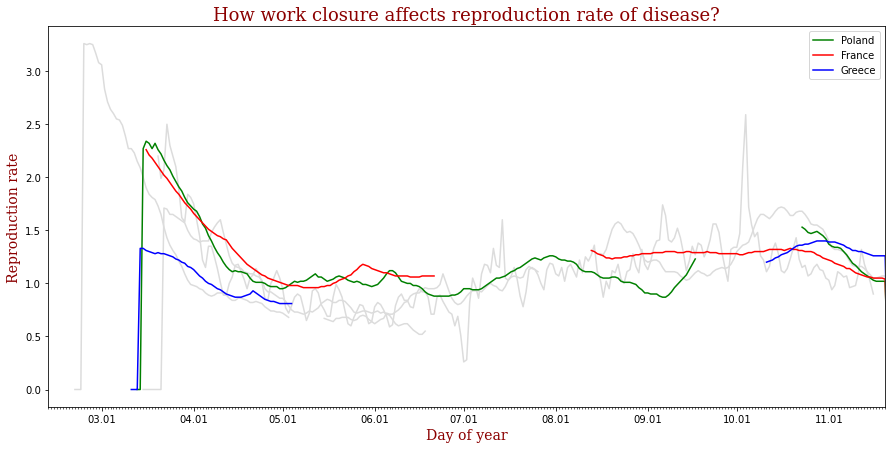

In [66]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
font2 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
fig, ax = plt.subplots(figsize = (15, 7))
f[['date']] = pd.to_datetime(f['date'], format = '%Y-%m-%d')
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%m.%d'))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))


test5=results[(results['Country']=='United Kingdom')].reset_index()
copy1=f[f['location']=='United Kingdom'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', label='_nolegend_')    
test5=results[(results['Country']=='Italy')].reset_index()
copy1=f[f['location']=='Italy'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', label='_nolegend_')    
test5=results[(results['Country']=='Hungary')].reset_index()
copy1=f[f['location']=='Hungary'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'gainsboro', label='_nolegend_')
test5=results[(results['Country']=='Poland')].reset_index()
copy1=f[f['location']=='Poland'].reset_index()
for i in range(len(test5)//2-1):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'g', label='_nolegend_')

a=test5.at[2*len(test5)//2-2,'Year']-23
b=test5.at[2*len(test5)//2-1,'Year']-22
answe=copy1.iloc[a:b]
plt.plot(answe['date'],answe['reproduction_rate'],'g', label='Poland')    
test5=results[(results['Country']=='France')].reset_index()
copy1=f[f['location']=='France'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'r', label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]
plt.plot(answe['date'],answe['reproduction_rate'],'r', label='France')
test5=results[(results['Country']=='Greece')].reset_index()
copy1=f[f['location']=='Greece'].reset_index()
for i in range(len(test5)//2):
    a=test5.at[2*i,'Year']-23
    b=test5.at[2*i+1,'Year']-22
    answe=copy1.iloc[a:b]
    plt.plot(answe['date'],answe['reproduction_rate'],'b', label='_nolegend_')
a=test5.at[len(test5)-1,'Year']-23
b=len(copy1)-1
answe=copy1.iloc[a:b]
plt.plot(answe['date'],answe['reproduction_rate'],'b', label='Greece')
plt.legend()
plt.xlabel('Day of year', fontdict=font)
plt.ylabel('Reproduction rate', fontdict=font)
plt.title('How work closure affects reproduction rate of disease?', fontdict=font2)
ax.set_xlim([datetime.date(2020, 2, 12), datetime.date(2020, 11, 20)])
plt.show()



## Porównanie wpływu restrykcji na reproduction rate i procentowy przyrost nowych przypadków

<Figure size 864x576 with 0 Axes>

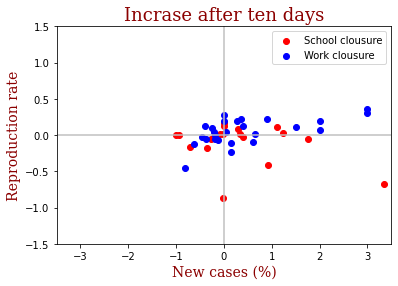

In [72]:
x1=[]
y1=[]
x=[]
y=[]
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
ax.axhline(y=0, color='silver')
ax.axvline(x=0, color='silver')
locations=["Greece","Poland","France","Italy","Hungary","Austria","Ireland","Spain","Norway","Croatia", "Latvia","Denmark","Serbia","Slovakia","Slovenia"]
days=8
for loc in locations:
    first=result[(result['Country']==loc)].reset_index().at[0,'Year']
    if(len(result[(result['Country']==loc)])>1):
        second=result[(result['Country']==loc)].reset_index().at[1,'Year']
        second=second-23
        x1.append(-f[f['location']==loc].reset_index().at[second,'reproduction_rate']+f[f['location']==loc].reset_index().at[second+days,'reproduction_rate'])
        y1.append((-f[f['location']==loc].reset_index().at[second,'new_cases']+f[f['location']==loc].reset_index().at[second+days,'new_cases'])/(f[f['location']==loc].reset_index().at[second,'new_cases']))
    first=first-23
    x1.append(-f[f['location']==loc].reset_index().at[first,'reproduction_rate']+f[f['location']==loc].reset_index().at[first+days,'reproduction_rate'])
    y1.append((-f[f['location']==loc].reset_index().at[first,'new_cases']+f[f['location']==loc].reset_index().at[first+days,'new_cases'])/(f[f['location']==loc].reset_index().at[first,'new_cases']))
plt.scatter( y1,x1, c="r", label="School clousure")
for loc in locations:
    if(len(result[(result['Country']==loc)])>1):
        second=results[(results['Country']==loc)].reset_index().at[1,'Year']
        second=second-23
        x.append(-f[f['location']==loc].reset_index().at[second,'reproduction_rate']+f[f['location']==loc].reset_index().at[second+days,'reproduction_rate'])
        y.append((-f[f['location']==loc].reset_index().at[second,'new_cases']+f[f['location']==loc].reset_index().at[second+days,'new_cases'])/(f[f['location']==loc].reset_index().at[second,'new_cases']))
    first=results[(results['Country']==loc)].reset_index().at[1,'Year']
    x.append(-f[f['location']==loc].reset_index().at[first,'reproduction_rate']+f[f['location']==loc].reset_index().at[first+days,'reproduction_rate'])
    y.append((-f[f['location']==loc].reset_index().at[first,'new_cases']+f[f['location']==loc].reset_index().at[first+days,'new_cases'])/f[f['location']==loc].reset_index().at[first,'new_cases'])
plt.scatter( y,x, c="b", label="Work clousure")
plt.xlabel('New cases (%)', fontdict=font)
plt.ylabel('Reproduction rate', fontdict=font)
plt.ylim(-1.5,1.5)
plt.xlim(-3.5,3.5)
plt.legend()
plt.title("Incrase after ten days",fontdict=font2)
plt.show()


# Nowe przypadki od PKB
Sprawdziliśmy również czy jest korelacja pomiędzy PKB państwa a ilośćią nowych przypadków


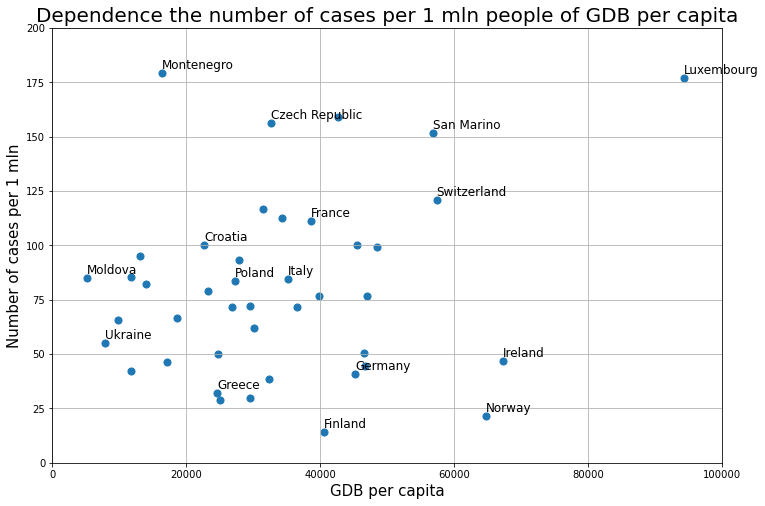

In [15]:
df = data[['location', 'new_cases_per_million', 'gdp_per_capita']]
#df = df[df['location'].isin(['Poland', 'Spain', 'Sweden', 'Austria', 'Germany', 'Italy', 'United Kingdom'])]
df = df.groupby(by = 'location').mean()
df['new_cases_per_million'] = round(df.new_cases_per_million, 2)
plt.figure(figsize=(12, 8))
plt.scatter(x = df['gdp_per_capita'], y = df['new_cases_per_million'],  s = 50)
plt.xlim(0, 100000)
plt.ylim(0, 200)
plt.grid(True)
plt.xlabel("GDB per capita", fontdict = {'fontsize': 15})
plt.title("Dependence the number of cases per 1 mln people of GDB per capita", 
          fontdict = {'fontsize': 20})
plt.ylabel("Number of cases per 1 mln", fontdict = {'fontsize': 15})
cases = df['new_cases_per_million'].tolist()
hdi = df['gdp_per_capita'].tolist()
i = -1
a = ['Poland', 'Montenegro', 'Moldova', 'Czech Republic', 'San Marino', 'Switzerland', 'Finland', 'Norway', 'Luxembourg', 'Germany', 'Ukraine', 'Ireland', 'France', 'Italy', 'Croatia', 'Greece']
for row in df.index:
    i += 1
    if row in a:
        plt.text(x = hdi[i] + 0.001, y = cases[i] + 2, s = row, fontdict = {'fontsize': 12})
        

plt.show()

